This notebook is indended to demonstrate `np.take_along_axis`

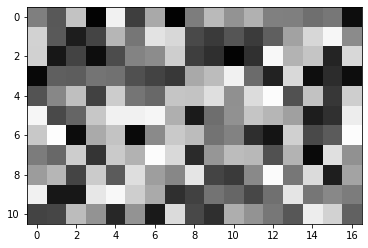

In [1]:
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import numpy as np

# Tip: use coprime dimensions to prevent accidental broadcasting when playing around
A = np.random.random((11, 17))

# Original matrix: don't scale to [0,1] interval
plt.imshow(A, 'gray', cm.NoNorm())

First column: [0.0314159  0.26378914 0.32728874 0.48645161 0.49805477 0.60947115
 0.78329626 0.81964955 0.82148766 0.94149484 0.96401892]


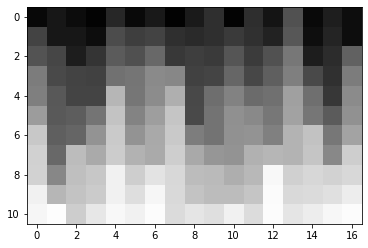

In [2]:
# Sort along first axis, leading to sorted columns
sorted_columns = np.take_along_axis(A, np.argsort(A, 0), 0)
plt.imshow(sorted_columns, 'gray', cm.NoNorm())
print('First column:', sorted_columns[:,0])

First row: [0.01019757 0.01309838 0.05257024 0.24219265 0.3464518  0.43574702
 0.46584057 0.48923682 0.49696063 0.49805477 0.50344931 0.58149684
 0.66389139 0.69335037 0.72750532 0.76772865 0.94504606]


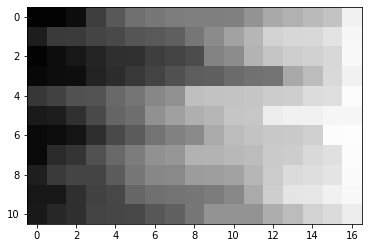

In [3]:
# Sort along second axis, leading to sorted rows
sorted_row = np.take_along_axis(A, np.argsort(A, 1), 1)
plt.imshow(sorted_row, 'gray', cm.NoNorm())
print('First row:', sorted_row[0])

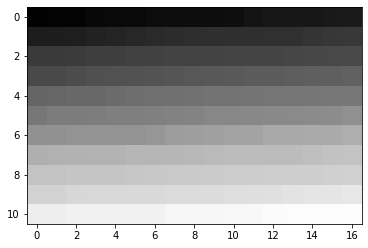

In [4]:
# Sort flattened array. Same as np.sort(A, None)
sorted_flattened = np.take_along_axis(A.flatten(), np.argsort(A, None), 0)
plt.imshow(sorted_flattened.reshape(A.shape), 'gray', cm.NoNorm())

In [5]:
# Three-dimensional case
B = np.random.random((5, 11, 17))

In [6]:
def plot_three_views(arr):
    fig, axes = plt.subplots(1, 3)
    for _arr, ax in zip([arr[0], arr[:,0], arr[:,:,0]], axes.flatten()):
        ax.imshow(_arr, 'gray', cm.NoNorm())

(5, 11, 17)
[ 90.77414294 100.75485029 100.37501811  95.57341565  93.43095764]
[44.03919038 45.81148708 41.28229721 43.43199461 46.30008072 45.62882768
 40.40579336 43.69366785 46.70165049 43.7921046  39.82129063]
[29.02357322 29.54230062 24.87617273 28.15084018 31.83201937 28.93120261
 29.03792402 26.30040695 26.8891924  24.95643694 27.79327957 31.0822819
 28.84781901 26.1434804  28.58282116 30.39846875 28.52016478]


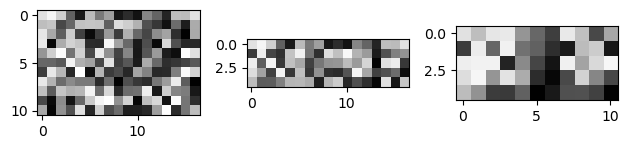

In [7]:
# Original three-dimensional array. Sums over all pairs of actions can be used to gain an intution of which elements are moved
plot_three_views(B)
print(B.shape, np.einsum('ijk->i', B), np.einsum('ijk->j', B), np.einsum('ijk->k', B), sep='\n')

What does `np.einsum` do? In this case it takes a three-dimensional array/tensor as input (`B`) with dimensions indexed as `i`, `j`, and `k` and produces a one-dimensional output by summing over the parameters not appearing in the output specification. This means `np.einsum('ijk->j', B)` produces the same as `B.sum(0).sum(-1)`, `B.sum(2).sum(0)`, or `B.sum(0).sum(1)`, but is easier to reason about.

For more complicated uses, e.g. multiplication of multiple tensors/arrays, consider taking a look at the documentation.

(5, 11, 17)
[ 33.94654262  63.89719927  96.97256594 128.31916083 157.77291597]
[44.03919038 45.81148708 41.28229721 43.43199461 46.30008072 45.62882768
 40.40579336 43.69366785 46.70165049 43.7921046  39.82129063]
[29.02357322 29.54230062 24.87617273 28.15084018 31.83201937 28.93120261
 29.03792402 26.30040695 26.8891924  24.95643694 27.79327957 31.0822819
 28.84781901 26.1434804  28.58282116 30.39846875 28.52016478]


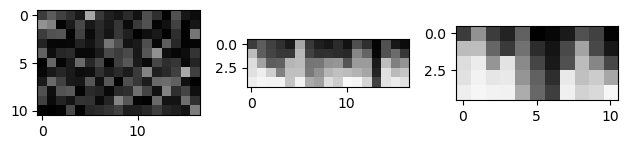

In [8]:
B0 = np.take_along_axis(B, np.argsort(B, 0), 0)
print(B0.shape, np.einsum('ijk->i', B0), np.einsum('ijk->j', B0), np.einsum('ijk->k', B0), sep='\n')
plot_three_views(B0)

(5, 11, 17)
[ 90.77414294 100.75485029 100.37501811  95.57341565  93.43095764]
[ 7.42766462 14.68782548 22.35775183 29.47941255 37.45014745 43.94313661
 50.83793333 58.24974179 65.01884005 72.3131267  79.14280422]
[29.02357322 29.54230062 24.87617273 28.15084018 31.83201937 28.93120261
 29.03792402 26.30040695 26.8891924  24.95643694 27.79327957 31.0822819
 28.84781901 26.1434804  28.58282116 30.39846875 28.52016478]


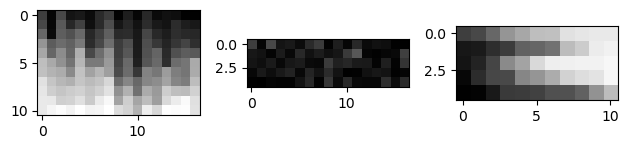

In [9]:
B1 = np.take_along_axis(B, np.argsort(B, 1), 1)
print(B1.shape, np.einsum('ijk->i', B1), np.einsum('ijk->j', B1), np.einsum('ijk->k', B1), sep='\n')
plot_three_views(B1)

(5, 11, 17)
[ 90.77414294 100.75485029 100.37501811  95.57341565  93.43095764]
[44.03919038 45.81148708 41.28229721 43.43199461 46.30008072 45.62882768
 40.40579336 43.69366785 46.70165049 43.7921046  39.82129063]
[ 3.03411339  6.67760967  9.63426161 12.59230678 15.64714298 19.00060062
 22.45506091 24.88348576 28.22248814 31.47645583 34.91416761 38.02973037
 41.32469201 43.86110186 46.94509072 49.7843553  52.42572107]


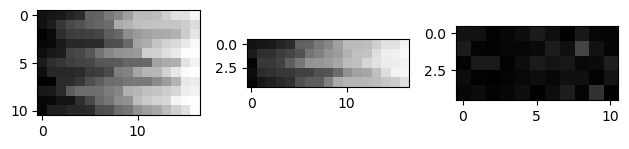

In [10]:
B2 = np.take_along_axis(B, np.argsort(B, 2), 2)
print(B2.shape, np.einsum('ijk->i', B2), np.einsum('ijk->j', B2), np.einsum('ijk->k', B2), sep='\n')
plot_three_views(B2)